**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Sergio Castro Reynoso
*   MATRÍCULA: A01794980


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [5]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')

# Obtener dimensiones del dataframe
print("Dimensiones del DataFrame:", air_df.shape)
print("------------------------------------------------------------------")

# Mostrar nombres de columnas
print("Columnas del DataFrame:", air_df.columns.tolist())
print("------------------------------------------------------------------")
# Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(air_df.head())
print("------------------------------------------------------------------")
# Mostrar las últimas 5 filas
print("Últimas 5 filas:")
print(air_df.tail())
print("------------------------------------------------------------------")
# Mostrar los tipos de datos de cada columna
print("Tipos de datos por columna:")
print(air_df.dtypes)
print("------------------------------------------------------------------")
# Calcular el porcentaje de valores faltantes por columna
porcentaje = air_df.isna().mean() * 100
print("Porcentaje de valores faltantes por columna:")
print(porcentaje)


Dimensiones del DataFrame: (43800, 6)
------------------------------------------------------------------
Columnas del DataFrame: ['Site', 'Species', 'ReadingDateTime', 'Value', 'Units', 'Provisional or Ratified']
------------------------------------------------------------------
Primeras 5 filas:
  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
------------------------------------------------------------------
Últimas 5 filas:
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [6]:
# Obtener la cantidad de valores únicos por columna
valores_unicos_por_columna = air_df.nunique()
print("Cantidad de valores únicos por columna:")
print(valores_unicos_por_columna)
print("------------------------------------------------------------------")
# Responder: ¿Cuántas mediciones se hicieron?
print(f"Cantidad de mediciones realizadas: {air_df.shape[0]}")
print("------------------------------------------------------------------")
# Responder: ¿Cuántos contaminantes del aire (Species) se analizaron?
print(f"Cantidad de contaminantes del aire analizados: {valores_unicos_por_columna['Species']}")
print("------------------------------------------------------------------")
# Identificar y eliminar columnas que no agregan valor informativo
columnas_no_informativas = [columna for columna, num in valores_unicos_por_columna.items() if num == 1]
print(f"Columnas no informativas: {columnas_no_informativas}")
print("------------------------------------------------------------------")
# Eliminar columnas no informativas
air_df.drop(columnas_no_informativas, axis=1, inplace=True)
print("------------------------------------------------------------------")
# Verificar que la columna 'Units' tampoco posee valor informativo
print(f"Valores únicos en la columna 'Units': {air_df['Units'].unique()}")
print("------------------------------------------------------------------")
# Eliminar la columna 'Units'
air_df.drop('Units', axis=1, inplace=True)


Cantidad de valores únicos por columna:
Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64
------------------------------------------------------------------
Cantidad de mediciones realizadas: 43800
------------------------------------------------------------------
Cantidad de contaminantes del aire analizados: 5
------------------------------------------------------------------
Columnas no informativas: ['Site', 'Provisional or Ratified']
------------------------------------------------------------------
------------------------------------------------------------------
Valores únicos en la columna 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']
------------------------------------------------------------------


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [7]:
# Realizar el conteo de valores por categoría para la columna 'Species'
conteo_species = air_df['Species'].value_counts()
print("Conteo de valores por categoría para la columna 'Species':")
print(conteo_species)
print("------------------------------------------------------------------")
# Determinar si las lecturas de cada contaminante coinciden con el total de mediciones
total_mediciones = air_df.shape[0]
suma_lecturas_por_contaminante = conteo_species.sum()
print("------------------------------------------------------------------")
if suma_lecturas_por_contaminante == total_mediciones:
    print("Las lecturas de cada contaminante coinciden con el total de mediciones.")
else:
    print("Las lecturas de cada contaminante no coinciden con el total de mediciones.")


Conteo de valores por categoría para la columna 'Species':
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
------------------------------------------------------------------
------------------------------------------------------------------
Las lecturas de cada contaminante coinciden con el total de mediciones.


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [8]:
# Usar groupby() para determinar el promedio del valor por contaminante
promedio_por_contaminante = air_df.groupby('Species')['Value'].mean()
print("Promedio del valor por contaminante:")
print(promedio_por_contaminante)


Promedio del valor por contaminante:
Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [11]:
# Cambiar el DataFrame al formato ancho con 'ReadingDateTime' como índice
# y cada 'Species' en una columna diferente
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
print("pvt_df generado")


pvt_df generado


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [13]:
# Obtener estadísticas descriptivas para cada contaminante
estadisticas = pvt_df.describe()
print("Estadísticas descriptivas para cada contaminante:")
print(estadisticas)
print("------------------------------------------------------------------")
# Mayor valor de NO2 y el día al que pertenece
mayor_valor_NO2 = estadisticas.loc['max', 'NO2']
dia_mayor_NO2 = pvt_df[pvt_df['NO2'] == mayor_valor_NO2].index[0]
print(f"El mayor valor de NO2 registrado es {mayor_valor_NO2} y pertenece al día {dia_mayor_NO2}.")
print("------------------------------------------------------------------")
# Menor valor de PM10 y el día al que pertenece
menor_valor_PM10 = estadisticas.loc['min', 'PM10']
dia_menor_PM10 = pvt_df[pvt_df['PM10'] == menor_valor_PM10].index[0]
print(f"El menor valor de PM10 registrado es {menor_valor_PM10} y pertenece al día {dia_menor_PM10}.")
print("------------------------------------------------------------------")
# Mediana de NO y su interpretación
mediana_NO = estadisticas.loc['50%', 'NO']
print(f"La mediana del NO es {mediana_NO}. Esto indica que el 50% de las mediciones de NO son menores o iguales a este valor.")
print("------------------------------------------------------------------")
# Primer cuartil de PM2.5 y su significado
primer_cuartil_PM25 = estadisticas.loc['25%', 'PM2.5']
print(f"El primer cuartil de PM2.5 es {primer_cuartil_PM25}. Esto significa que el 25% de las mediciones de PM2.5 son menores o iguales a este valor.")


Estadísticas descriptivas para cada contaminante:
Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000
------------------------------------------------------------------
El mayor valor de NO2 registrado es 120.2 y pertenece al día 24/01/2017 19:00.
------------------------------------------------------------------
El menor valor de PM10 registrado es -5.6 y pertenece al día 12/09/2017 23:00.
-

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

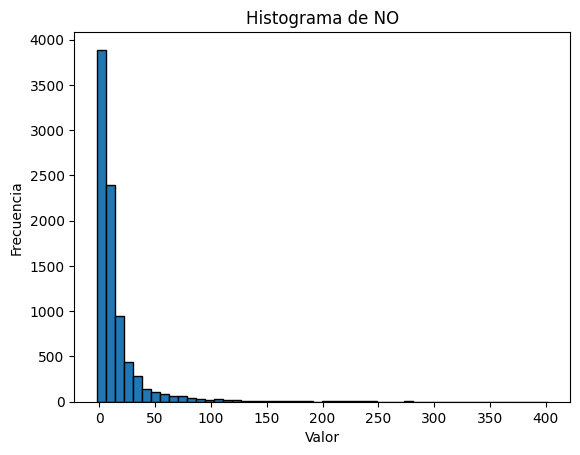

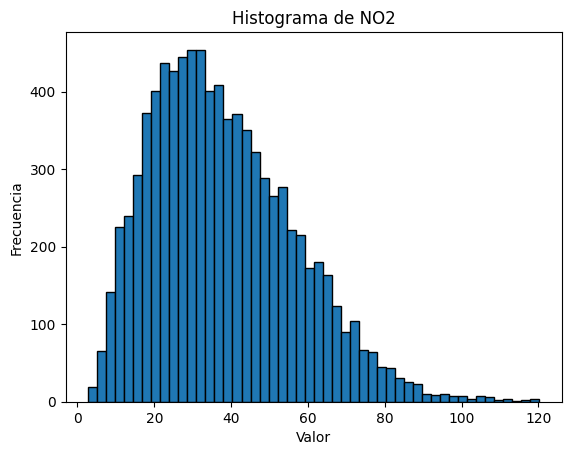

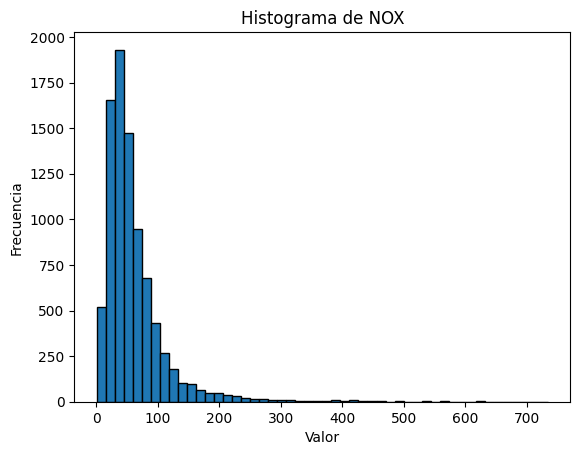

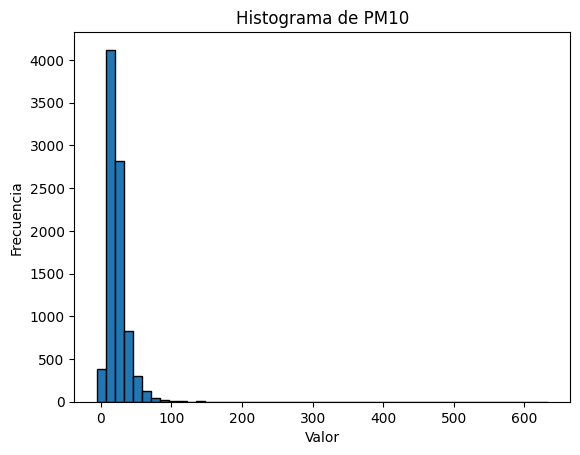

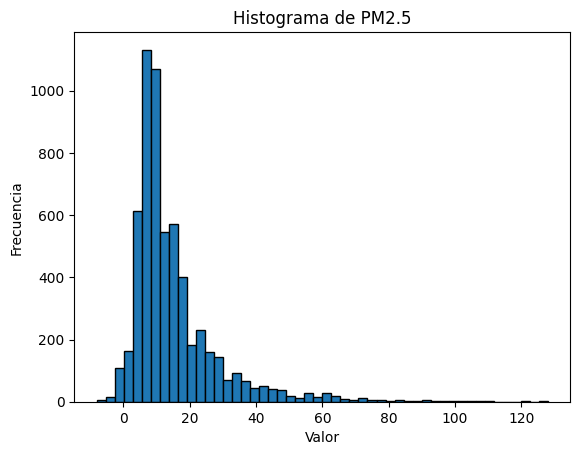

Desviación estándar para cada contaminante:
Species
NO       26.678565
NO2      18.580841
NOX      54.584805
PM10     15.344755
PM2.5    13.558588
dtype: float64
El contaminante con mayor variabilidad es NOX.


In [14]:
import matplotlib.pyplot as plt

# Dibujar histogramas para cada columna (cada contaminante)
for columna in pvt_df.columns:
    plt.figure()
    plt.hist(pvt_df[columna].dropna(), bins=50, edgecolor='black')  # Ignorar valores nulos
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

# Calcular la desviación estándar para cada columna para determinar la variabilidad
desviacion_estandar = pvt_df.std()
print("Desviación estándar para cada contaminante:")
print(desviacion_estandar)

# Identificar el contaminante con la mayor variabilidad
contaminante_mayor_variabilidad = desviacion_estandar.idxmax()
print(f"El contaminante con mayor variabilidad es {contaminante_mayor_variabilidad}.")


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [20]:
# Esta línea carga los datos al dataframe
air_df = pd.read_csv('LaqnData.csv')

# Esta línea separa la columna 'ReadingDateTime' en dos columnas, una para la fecha y otra para la hora.
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)

# Esta línea asigna los nombres 'Date' y 'Time' a las nuevas columnas creadas.
datetime_df.columns = ['Date', 'Time']

# Esta línea muestra el DataFrame datetime_df para visualizar los cambios.
datetime_df

# Esta línea toma la columna 'Date' y la separa en tres nuevas columnas para el día, mes y año.
date_df = datetime_df.Date.str.split('/', expand=True)

# Esta línea asigna los nombres 'Day', 'Month' y 'Year' a las nuevas columnas creadas.
date_df.columns = ['Day', 'Month', 'Year']

# Esta línea muestra el DataFrame date_df para visualizar los cambios.
date_df

# Esta línea añade las columnas de date_df y la columna 'Time' al DataFrame original, y elimina las columnas 'ReadingDateTime' y 'Year'.
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])

# Esta línea establece las columnas 'Month', 'Day', 'Time', y 'Species' como índices del DataFrame.
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])

#Esta línea muestra el DataFrame air_df para visualizar los cambios que se han realizado
air_df



Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales? No, no son iguales.

In [21]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt() y pivot() son como opuestos: melt() hace que el dataframe sea más largo y menos ancho, metiendo varias columnas en una sola. Pivot() hace que el DataFrame sea más ancho y menos largo, expandiendo una columna en varias. Stack() y unstack() hacen algo similar, pero juegan con los índices, no las columnas. Stack() apila las columnas en un índice más profundo, y unstack() hace lo contrario.

Si tuviera que emparejar melt() con stack() o unstack(), elegiría stack(). Ambos hacen que el DataFrame sea más "largo", aunque de diferentes maneras: melt() juega con las columnas y stack() con los índices.